<a href="https://colab.research.google.com/github/jinwoo0114/projects/blob/master/Terrorism_Democracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Do Countries Experience Fewer Terrorist Attacks As They Become More Democratic?

By Jin Woo Chung

---
**Background**


Our project uses primary data set from the University of Maryland Global Terrorism Database (GTD). The GTD has data on terrorist attacks around the globe starting from 1970 to 2018, containing variables such as the number of attacks, fatalities, group claiming the attack, type of weapon and so on.

In addition, our project uses a second dataset from Freedom House, which releases yearly rankings on countries around the world based on the degree of Political Rights (PR) and Civil Liberties (CL) they have. For our project, we restricted our data just to PR to simplify our analysis, and because PR appears to align more closely with the process of democratic policy making. The PR rating ranges from 1 - 7, where the *lower* the rating is, the *greater* the degree of democracy/freedom. 



**Purpose**

Our purpose in analyzing these datasets is to identify whether a trend exists between countries enjoying more peace as they become more democratic. Our analysis extends over the time period of 1990 to 2017, as PR ratings were only available up to 2017. We use the PR rating as an indicator of the level of democracy in a country. This is based on the assumption that the more a democratic a country is, the more the population is able to control the policy making through voting and other rights afforded to them instead of resorting to violence. 

**Caveats**

Since our analysis is merely identifying trends, no assessment can be made on the causality of our claim. To make causal assumptions, we would need to run a regression controlling for relevant variables. Our aim is exploratory in order to identify whether our assumption holds any weight.


**Conclusions**

Our initial level of analysis seems to suggest the opposite of our assumption i.e. more democratic countries such as the US experience greater terrorist attacks than some of the most undemocratic regimes in the world, such as China. 

However, as this project is merely exploratory, there are strong reasons to be skeptical of our finding as there may be several variables at play e.g. economic cycles, national/local laws (e.g. lax gun laws, and debates over abortion laws appear to incite terrorist incidents in the US), national political divisions, racially homogenous vs. non-homogenous societies and so on.

---




## Global Terrorism Data on Each Country

Datasource:  University of Maryland Global Terrorism Database (GTD)

Link: https://www.start.umd.edu/gtd/

The GTD is a comprehensive list of all terrorist attack from 1970s and onwards.

Each row in this dataset represents a terrorist attack. 

Although we are pulling many different columns, we will be focusing on the following ones:

*   'iyear' which is the year the terror attack occurred in.
*   'country_txt' which is the country the terror attack occured in.



In [0]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Make sure notebook prints plots
%matplotlib inline

# Extend limits on rows and columns shown to 200 max
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)

In [0]:
# Reading the global terrorist database excel spreadsheet 
# NOTE: This will take a while! (approx. 2 mins)
df_t = pd.read_excel('globalterrorismdb_0919dist.xlsx',
                      index_col = 0, skipinitialspace=True) 

df_t.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosiv

In [0]:
# Given the size of the global terrorist dataframe, we will now only filter 
# for the years from 1990 to 2017.
df_t90_17 = df_t.loc[(df_t['iyear'] >= 1990) &
                                    (df_t['iyear'] <= 2017)]

# After filtering for the specific years, 
# now we will select only certain columns we are interested in
df_t90_17_clean = df_t90_17[['iyear','country_txt']]

df_t90_17_clean.head()

,iyear,country_txt
eventid,,
199001000001,1990,Lebanon
199001010001,1990,India
199001010002,1990,India
199001010003,1990,India
199001010004,1990,Bolivia


In [0]:
# Grouping the large terrorist dataframe by country and year
df_t_attack = df_t90_17_clean.groupby(['country_txt','iyear']
                                      ).aggregate('size').reset_index()

# Renaming the columns to include number of attacks
df_t_attack.columns = ['COUNTRY','YEAR','ATTACKS']

df_t_attack.head()

,COUNTRY,YEAR,ATTACKS
0,Afghanistan,1990,2
1,Afghanistan,1991,30
2,Afghanistan,1992,36
3,Afghanistan,1994,9
4,Afghanistan,1995,6


## Freedom House Rating on Level of Political Rights by Country
Data Source: Freedom House

Link: https://freedomhouse.org/content/freedom-world-data-and-resources

The first step is to extract the Freedom House data, which contains the level of political rights of each country from 1973 to 2017. Our first step is to extract all the data into a dataframe, and then converting the data into a long dataset for a time series analysis.

Although we are pulling many different columns, we will be focusing on the following ones:

*   'COUNTRY' is the country that has the rating.
*   'YEAR' which is the year in which the country received the rating.
*   'PR' is the level of political rights in the country from 1 to 7. A score of 1 means it's a vibrant democratic country, and a score of 7 means it's a severely authoritarian country.

In [0]:
# Read the table from Freedom House
df_f = pd.read_excel(
    'Country and Territory Ratings and Statuses FIW1973-2018.xlsx',
    index_col = 0, sheet_name=1, header=[1,2], skipinitialspace=True) 

df_f.head()

Year(s) Under Review 1972            1973            1974            1975      \
                       PR CL  Status   PR CL  Status   PR CL  Status   PR CL    
Afghanistan             4   5     PF    7   6     NF    7   6     NF    7   6   
Albania                 7   7     NF    7   7     NF    7   7     NF    7   7   
Algeria                 6   6     NF    6   6     NF    6   6     NF    7   6   
Andorra                 4   3     PF    4   4     PF    4   4     PF    4   4   
Angola                  -   -      -    -   -      -    -   -      -    6   6   

Year(s) Under Review        1976            1977            1978             \
                     Status   PR CL  Status   PR CL  Status   PR CL  Status   
Afghanistan              NF    7   6     NF    6   6     NF    7   7     NF   
Albania                  NF    7   7     NF    7   7     NF    7   7     NF   
Algeria                  NF    6   6     NF    6   6     NF    6   6     NF   
Andorra                  PF    4   4     PF    -   -      -    -   -      -   
Angola                   NF    6   6     NF    7   7     NF    7   7     NF   

Year(s) Under Review 1979            1980            Jan.1981-Aug. 1982      \
                       PR CL  Status   PR CL  Status                 PR CL    
Afghanistan             7   7     NF    7   7     NF                  7   7   
Albania                 7   7     NF    7   7     NF                  7   7   
Algeria                 6   6     NF    6   6     NF                  6   6   
Andorra                 -   -      -    -   -      -                  -   -   
Angola                  7   7     NF    7   7     NF                  7   7   

Year(s) Under Review        Aug.1982-Nov.1983            Nov.1983-Nov.1984  \
                     Status                PR CL  Status                PR   
Afghanistan              NF                 7   7     NF                 7   
Albania                  NF                 7   7     NF                 7   
Algeria                  NF                 6   6     NF                 6   
Andorra                   -                 -   -      -                 -   
Angola                   NF                 7   7     NF                 7   

Year(s) Under Review            Nov.1984-Nov.1985             \
                     CL  Status                PR CL  Status   
Afghanistan            7     NF                 7   7     NF   
Albania                7     NF                 7   7     NF   
Algeria                6     NF                 6   6     NF   
Andorra                -      -                 -   -      -   
Angola                 7     NF                 7   7     NF   

Year(s) Under Review Nov.1985-Nov.1986            Nov.1986-Nov.1987      \
                                    PR CL  Status                PR CL    
Afghanistan                          7   7     NF                 7   7   
Albania                              7   7     NF                 7   7   
Algeria                              6   6     NF                 6   6   
Andorra                              -   -      -                 -   -   
Angola                               7   7     NF                 7   7   

Year(s) Under Review        Nov.1987-Nov.1988            Nov.1988-Dec.1989  \
                     Status                PR CL  Status                PR   
Afghanistan              NF                 6   6     NF                 7   
Albania                  NF                 7   7     NF                 7   
Algeria                  NF                 5   6     NF                 6   
Andorra                   -                 -   -      -                 -   
Angola                   NF                 7   7     NF                 7   

Year(s) Under Review            1990            1991            1992      \
                     CL  Status   PR CL  Status   PR CL  Status   PR CL    
Afghanistan            7     NF    7   7     NF    7   7     NF    6   6   
Albania                7   

In [0]:
# Unstacking the years of each country and making the data longer and less wide
df_f2 = df_f.stack(level=0).reset_index()

# For some reason, CL appears twice when elongating the data
# Renaming the columns of the Freedom House dataset
df_f2.columns = ['COUNTRY','YEAR','X','CL','PR','STATUS']

# As previously mentioned, CL appears twice, so only using PR (Political Rights)
df_freedom = df_f2[['COUNTRY','YEAR','PR']]

df_freedom.head()

,COUNTRY,YEAR,PR
0,Afghanistan,1972,4
1,Afghanistan,1973,7
2,Afghanistan,1974,7
3,Afghanistan,1975,7
4,Afghanistan,1976,7


This dataframe will include all Political Rights rating (PR) of each country by Freedom House from 1972 to 2017.

#Merging

We finally have the dataframe from Freedom House that has the political rights ratings and the dataframe from the Global Terrorist Database complete. We will now merge them together. 

In [0]:
# Merge clean GTD data with Freedom House data
# Because it is an inner merge, only the years 1990 to 2017 will be considered
df_freedom_terror = df_t_attack.merge(df_freedom,
                                         on=['COUNTRY', 'YEAR'], how='inner')

df_freedom_terror.head()

,COUNTRY,YEAR,ATTACKS,PR
0,Afghanistan,1990,2,7
1,Afghanistan,1991,30,7
2,Afghanistan,1992,36,6
3,Afghanistan,1994,9,7
4,Afghanistan,1995,6,7


Unfortunately, not all the necessary data are in integers. We have to change the data types of Year, Attacks, Killed, and PR to integers.

In [0]:
# PR has '-' characters, so to get rid of them, we use the following for loop

pr_col = df_freedom_terror['PR'] # Selects the PR column
single_pr = [] # Creates new data for appending integers
for rating in pr_col:
  rating = str(rating)
  if '-' in rating:
    x=0 # 0 will replace '-'
    single_pr.append(x) # This makes sure 0 will replace '-'
  else:
    single_pr.append(rating) # When not '-', the rating will remain the same 

df_freedom_terror['PR'] = single_pr # Executes the replacement


# Applying integers to all relevant variables

df_freedom_terror['YEAR'] = df_freedom_terror['YEAR'].apply(int)
df_freedom_terror['ATTACKS'] = df_freedom_terror['ATTACKS'].apply(int)
df_freedom_terror['PR'] = df_freedom_terror['PR'].apply(int)


## Visualizing the Merged Data

We will now visualize the number of attacks in a particular country and their PR rating from the years 1990 to 2017 on a single graph to identify trends. 

Each graph represents a single country, and the two lines represent the number of terrorist attacks they've experienced in a year and the respective Political Rights (PR) rating they received from Freedom House. 

The red line represent how many terror attacks they've had, and the blue line represents their PR score from Freedom House.

As mentioned in our introduction, the graphs seem to suggest that more democratic countries seem to experience more terror attacks, but this is purely exploratory, so no conclusions can be confidently made.

In [0]:
#Function for creating new dataframe for a specific country
def create_dfcountry(countryname):
  df_country_noindex = df_freedom_terror.loc[df_freedom_terror
                                             ['COUNTRY']==countryname]
  df_country_index = df_country_noindex.set_index('YEAR', drop=False)
  return df_country_index

# Function for creating list of years for the x-axis
def create_xaxis(countryname):
  df_c = create_dfcountry(countryname)
  return df_c['YEAR'].tolist()

# Function for graphs and tables
def create_countrygraph(countryname):
  # Plotting PR and attacks
  fig, ax1 = plt.subplots(figsize=(8,6))
  df_countrygraph = create_dfcountry(countryname)
  # Specifying what my data my y axes are using
  x = create_xaxis(countryname)
  y1 = df_countrygraph.ATTACKS
  y2 = df_countrygraph.PR
  # Plotting and color coding data for axis 1 which is Attacks
  color = 'tab:red'
  ax1.set_xlabel('Year', fontsize = 15)
  ax1.set_ylabel('Total Number of Attacks', fontsize=17, color = color)
  ax1.plot(x, y1, color = color)
  ax1.tick_params(axis='y', labelcolor=color)
  ax2 = ax1.twinx()  # making a second y axis sharing the same x-axis
  # Set limits for second axis on PR rating
  ax2.set_ylim([0.5, 7.5])
  # Plotting and color coding data for axis 2 which is PR rating
  color = 'tab:blue'
  ax2.set_ylabel('Political Rights Rating', fontsize=17, color = color)  
  ax2.plot(x, y2, color = color)
  ax2.tick_params(axis='y', labelcolor=color)
  # Some other formatting
  ax1.grid(True)
  ax1.set_title('{:} Terrorist Attacks and PR Rating'.format(countryname),fontsize= 20)
  fig.tight_layout() 
  return plt.show()

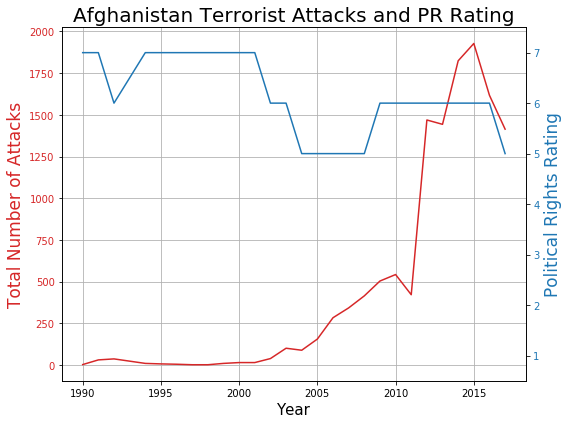

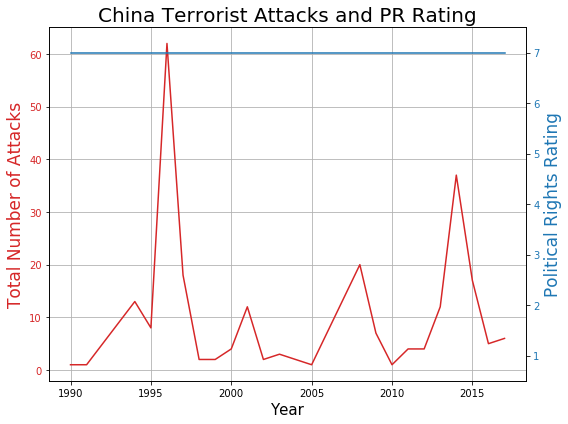

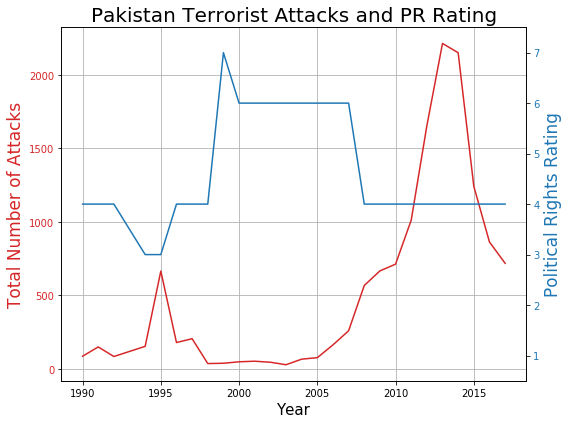

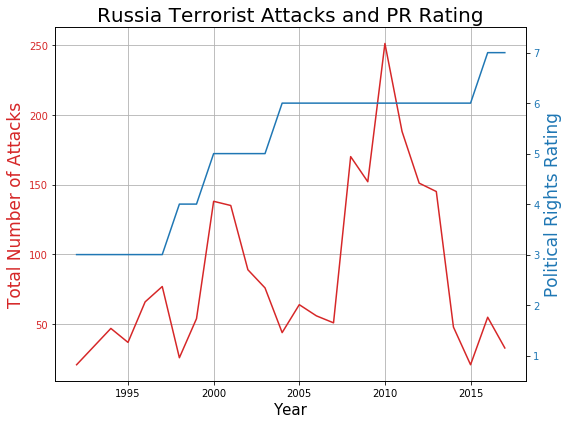

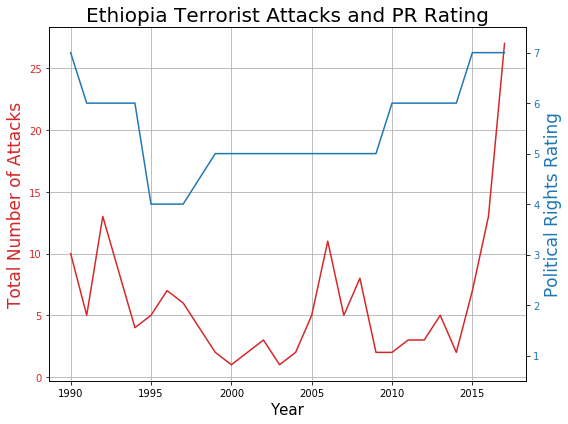

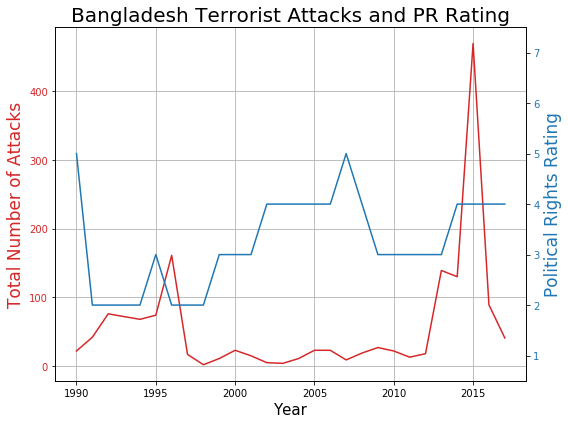

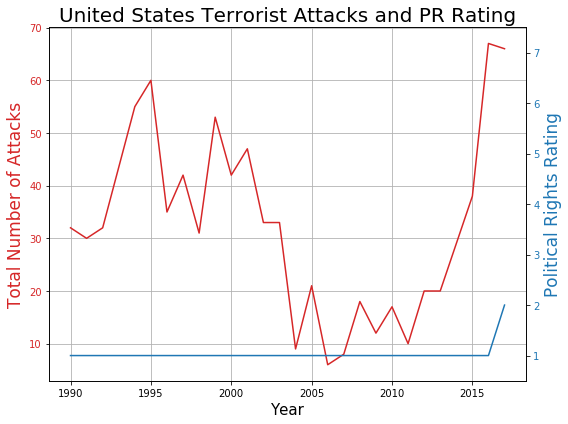

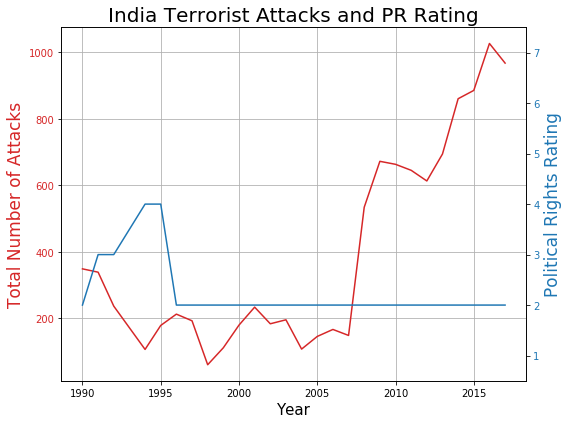

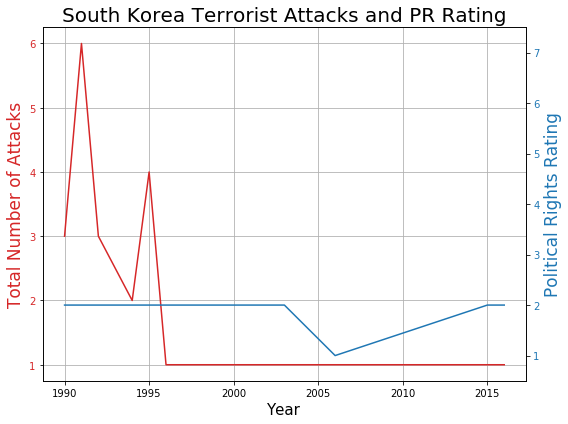

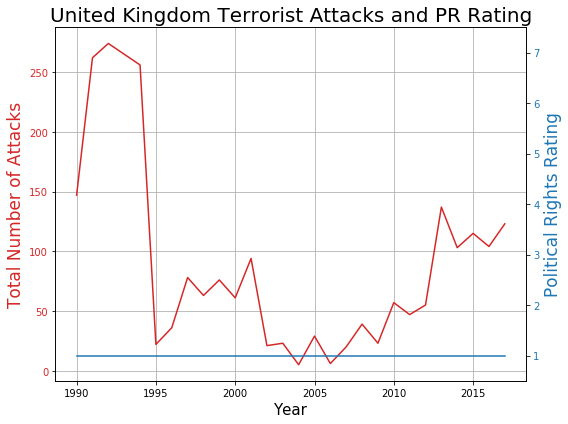

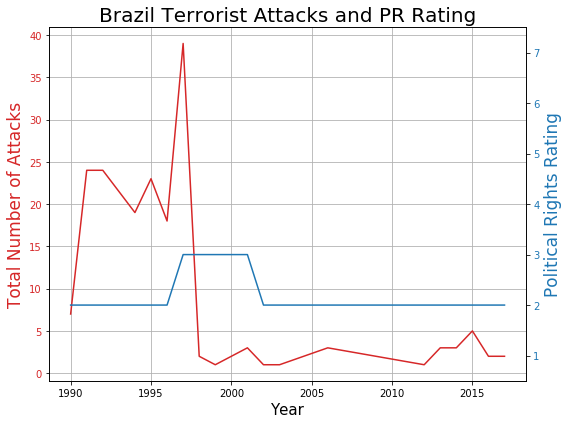

In [0]:
# Running our function on various democratic and undemocratic countries
# as defined by Freedom House

# Undemocratic
create_countrygraph('Afghanistan')
create_countrygraph('China')
create_countrygraph('Pakistan')
create_countrygraph('Russia')
create_countrygraph('Ethiopia')
create_countrygraph('Bangladesh')

# Democratic
create_countrygraph('United States')
create_countrygraph('India')
create_countrygraph('South Korea')
create_countrygraph('United Kingdom')
create_countrygraph('Brazil')

